In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

In [3]:
df = pd.read_csv(r"C:\Users\likitha\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.shape

(768, 9)

In [13]:
# NORMALISATION

In [15]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Extract numerical data
data = df[numerical_cols]

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
# Min-Max Normalization (Feature Scaling)
# RANGE IS FROM 0-1

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
df_min_max = pd.DataFrame(scaler.fit_transform(data), columns=numerical_cols)


In [23]:
df_min_max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [25]:
# Z-Score Normalization (Standardization)
# mean = 0 and standard deviation = 1

In [27]:
from scipy.stats import zscore

df_zscore = data.apply(zscore)  # Apply z-score normalization to each column
print(df_zscore.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  


In [29]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
# Apply Z-score normalization
df_zscore = pd.DataFrame(scaler.fit_transform(data), columns=numerical_cols)

In [31]:
df_zscore

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [33]:
# LOG TRANSFORMATION

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.945910  5.003946       4.290459       3.583519  0.000000  3.543854   
1     0.693147  4.454347       4.204693       3.401197  0.000000  3.317816   
2     2.197225  5.214936       4.174387       0.000000  0.000000  3.190476   
3     0.693147  4.499810       4.204693       3.178054  4.553877  3.370738   
4     0.000000  4.927254       3.713572       3.583519  5.129899  3.786460   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.486738  3.931826  0.693147  
1                  0.300845  3.465736  0.000000  
2                  0.514021  3.496508  0.693147  
3                  0.154436  3.091042  0.000000  
4                  1.190279  3.526361  0.693147  


Text(0.5, 1.0, 'After Log Transformation')

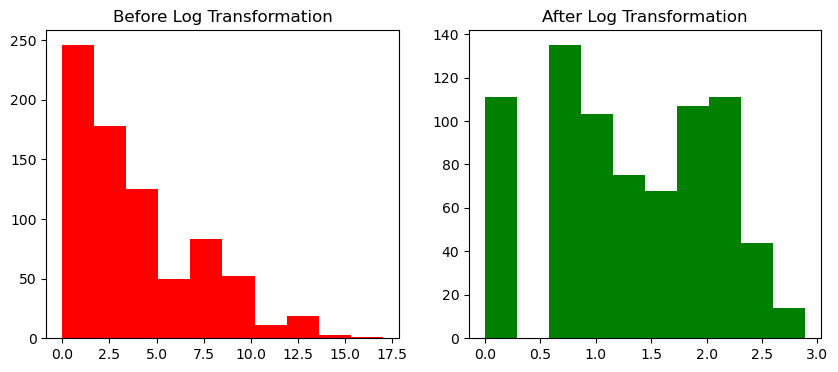

In [35]:
# Apply log transformation (log(1 + X) to handle zeros)
df_log_transformed = data.apply(lambda x: np.log1p(x))

# Display transformed data
print(df_log_transformed.head())

plt.figure(figsize=(10, 4))

# Before Log Transformation
plt.subplot(1, 2, 1)
plt.hist(data[numerical_cols[0]], bins=10, color='red')
plt.title("Before Log Transformation")

# After Log Transformation
plt.subplot(1, 2, 2)
plt.hist(df_log_transformed[numerical_cols[0]], bins=10, color='green')
plt.title("After Log Transformation")

In [37]:
df_log_transformed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,5.003946,4.290459,3.583519,0.000000,3.543854,0.486738,3.931826,0.693147
1,0.693147,4.454347,4.204693,3.401197,0.000000,3.317816,0.300845,3.465736,0.000000
2,2.197225,5.214936,4.174387,0.000000,0.000000,3.190476,0.514021,3.496508,0.693147
3,0.693147,4.499810,4.204693,3.178054,4.553877,3.370738,0.154436,3.091042,0.000000
4,0.000000,4.927254,3.713572,3.583519,5.129899,3.786460,1.190279,3.526361,0.693147
...,...,...,...,...,...,...,...,...,...
763,2.397895,4.624973,4.343805,3.891820,5.198497,3.523415,0.157858,4.158883,0.000000
764,1.098612,4.812184,4.262680,3.332205,0.000000,3.632309,0.292670,3.332205,0.000000
765,1.791759,4.804021,4.290459,3.178054,4.727388,3.303217,0.219136,3.433987,0.000000
766,0.693147,4.844187,4.110874,0.000000,0.000000,3.437208,0.299364,3.871201,0.693147


In [39]:
# LABEL ENCODING

In [41]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [43]:
categorical_cols

Index([], dtype='object')

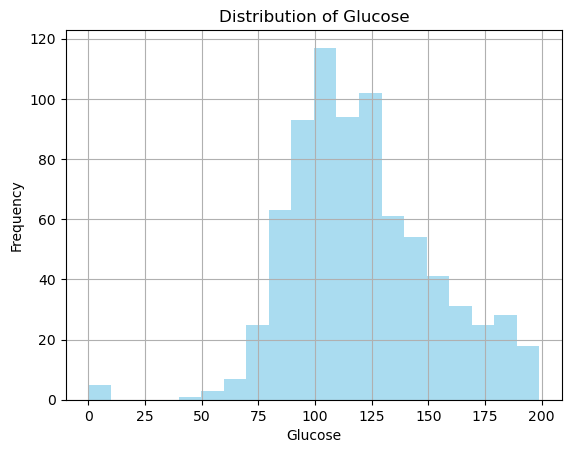

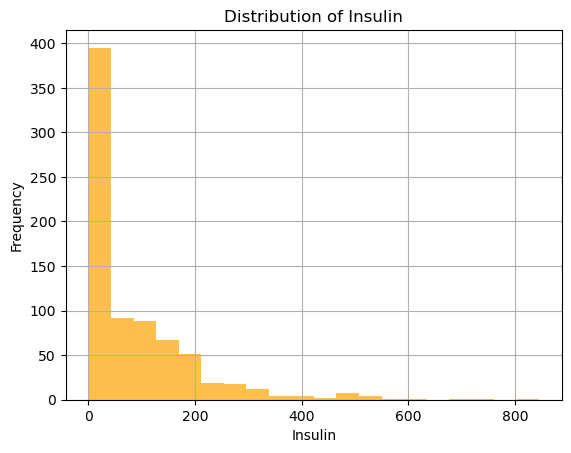

In [45]:
# Histogram for 'Glucose' and 'Insulin'
df['Glucose'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

df['Insulin'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

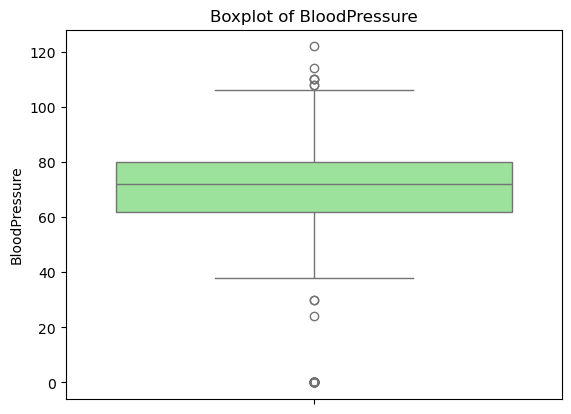

In [47]:
import seaborn as sns 
# Boxplot for 'BloodPressure'
# Boxplot - is used to outlier (types - valid and invalid)
sns.boxplot(y=df['BloodPressure'], color='lightgreen')
plt.title('Boxplot of BloodPressure')
plt.show()

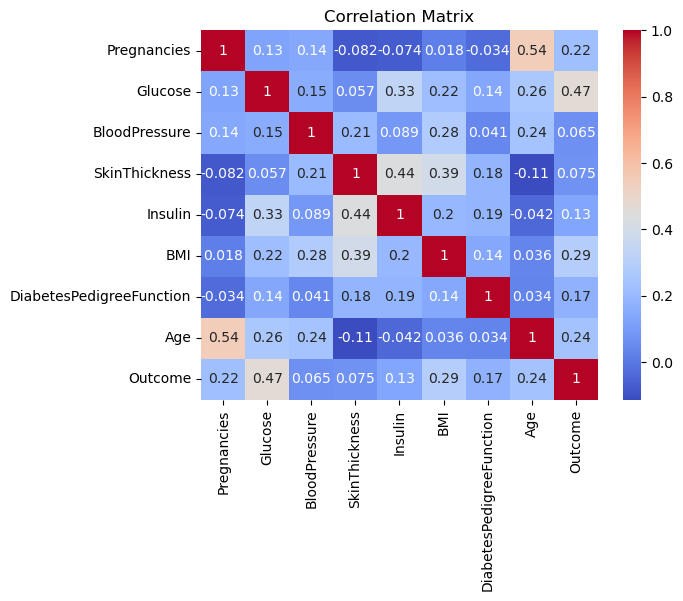

In [49]:
# Correlation analysis for numerical features
# select numerical coloums coz we can't find relation for string values
# columns = [' ', ' ', ' '] 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()     #correlation matrix - corr()

#seaborn is used 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

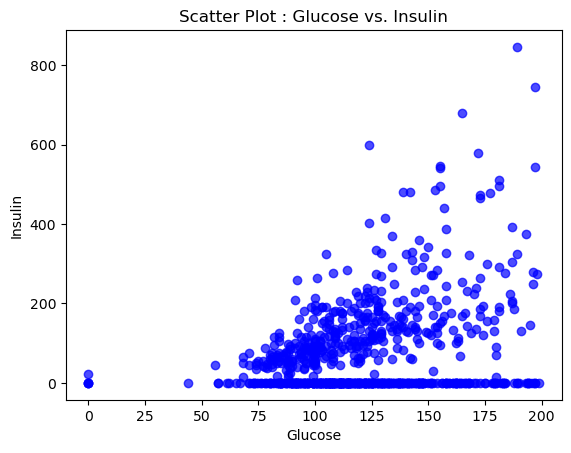

In [51]:
#scatter plot for Attendance_Rate vs. Final_Exam_Score
plt.scatter(df['Glucose'], df['Insulin'], color='blue', alpha = 0.7)
plt.title("Scatter Plot : Glucose vs. Insulin")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

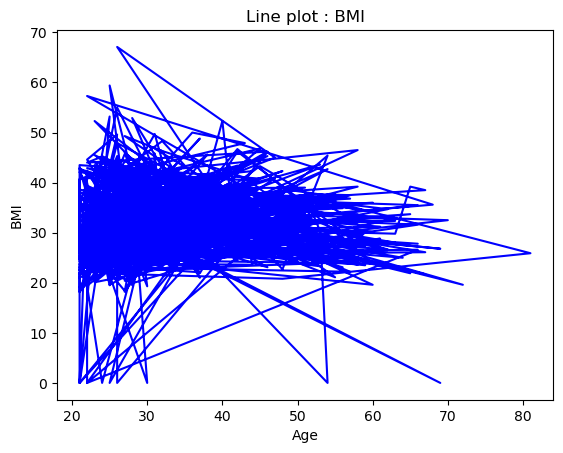

In [53]:
# line plot for Attendance_Rate by passenger index
plt.plot(df['Age'], df['BMI'], color = 'blue')
plt.title("Line plot : BMI")
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()